Mean Absolute Error (MAE): 0.085781412
Mean Absolute Percentage Error (MAPE): 8.606150421%
Root Mean Squared Error (RMSE): 0.085788403
R-squared (R2) Value: -6134.708598290


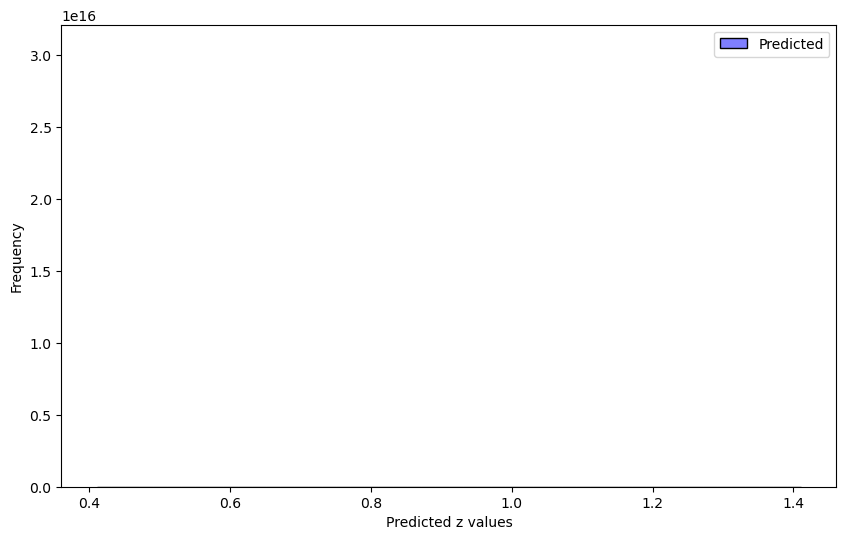

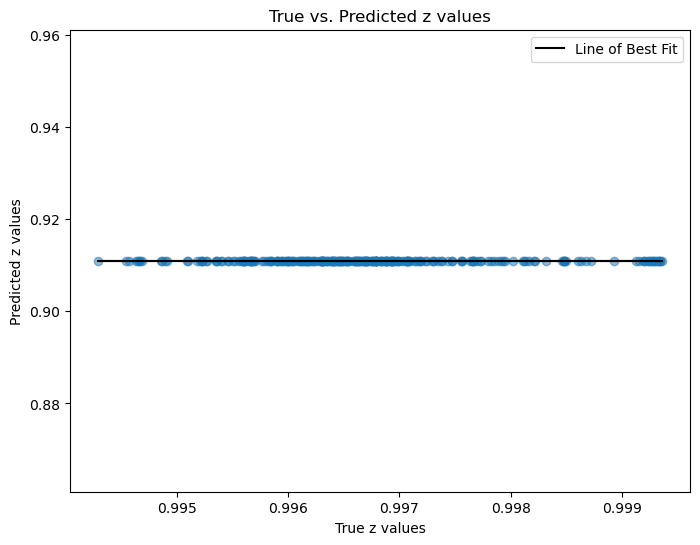

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import linregress

# Load your dataset
data = pd.read_csv('model_dataframe.csv')

# Select features and target variable
selected_features = ['T (K)', 'P (MPa)', 'methane', 'propane', 'ibutane', 'ipentane', 'hexane', 'heptane', 'helium', 'oxygen', 'H2S', 'CO2']
target = "z"

X = data[selected_features]
y = data[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the ANN model
model = MLPRegressor(hidden_layer_sizes=(1,), max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Make predictions using the model
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.9f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.9f}%")
print(f"Root Mean Squared Error (RMSE): {rmse:.9f}")
print(f"R-squared (R2) Value: {r2:.9f}")

# Create a histogram with KDE and 50 bins of predicted "z" values
plt.figure(figsize=(10, 6))
sns.histplot(y_pred, kde=True, bins=50, color='blue', label='Predicted')
plt.xlabel("Predicted z values")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# Create a plot of actual "z" values vs. predicted values with a line of best fit
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("True z values")
plt.ylabel("Predicted z values")
plt.title("True vs. Predicted z values")

# Calculate and plot the line of best fit
slope, intercept, r_value, p_value, std_err = linregress(y_test, y_pred)
plt.plot(y_test, slope * y_test + intercept, color='black', label='Line of Best Fit')
plt.legend()
plt.show()

# Save the predictions to a CSV file
predictions_df = pd.DataFrame({'base-case ANN': y_pred})
predictions_df.to_csv('ANN.csv', index=False)
